In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

X = load_iris().data
y = load_iris().target

feature_names = load_iris().feature_names
target_names = load_iris().target_names

print(X.shape)
print(y.shape)

print(feature_names)
print("------")
print(target_names)

df = pd.DataFrame(X, columns=feature_names)
df['target'] = [target_names[i] for i in y]
print(df.shape)
print(df.columns)


(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
------
['setosa' 'versicolor' 'virginica']
(150, 5)
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [3]:
def lda_plot(X, y, class_labels, title):
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit_transform(X, y)
    
    df_lda = pd.DataFrame({"X": X_lda.flatten(), "Y": class_labels})

    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df_lda, x="X", hue="Y", fill=True, alpha=0.4)
    plt.title(title)
    plt.xlabel("LDA 1D Projection")
    plt.ylabel("Density")
    plt.show()



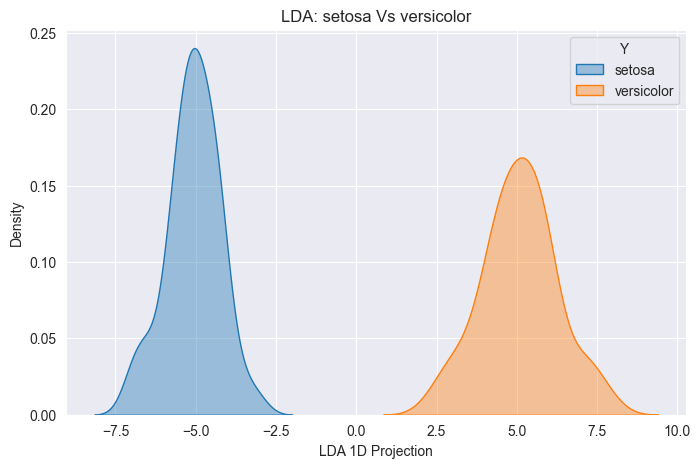

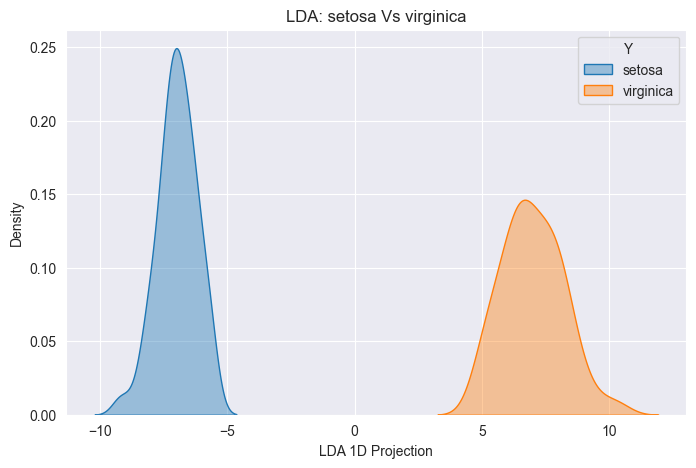

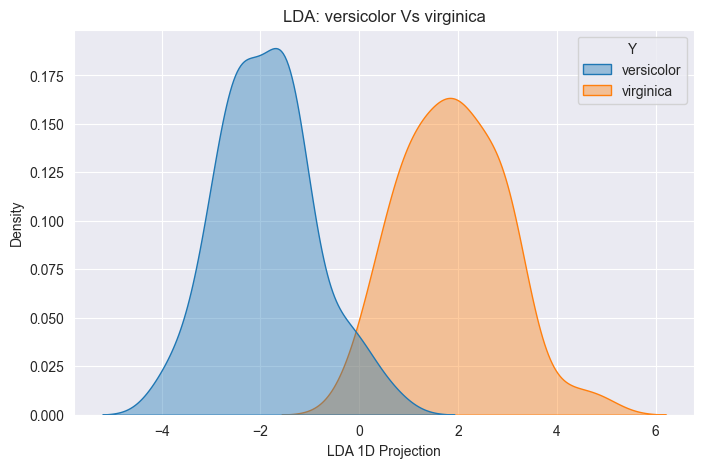

In [4]:
import itertools
class_list = [(str(a), str(b)) for a, b in itertools.combinations(target_names, 2)]

for name in class_list:
    class_id = []
    class_id.append(np.where(target_names == name[0])[0][0])
    class_id.append(np.where(target_names == name[1])[0][0])
    mask = np.isin(y, class_id)
    lda_plot(X[mask], y[mask], [target_names[i] for i in y[mask]], f'LDA: {name[0]} Vs {name[1]}')
    

(150, 2)
(150, 2)
(300,)
(300, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3

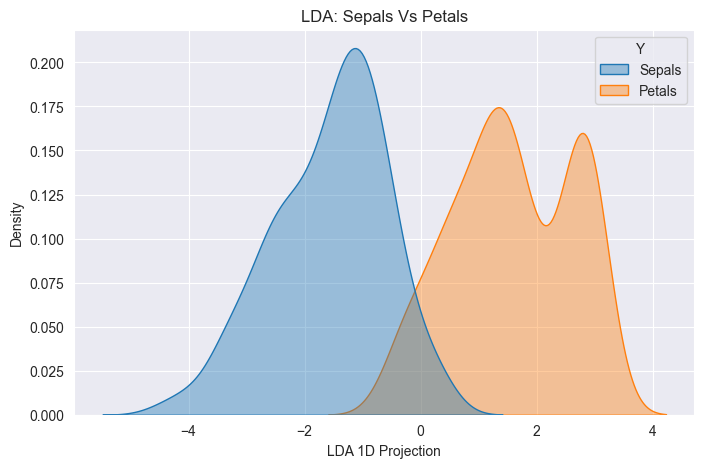

In [10]:
#comfuse about this assignment

sepal_features = X[:, :2]
petal_features = X[:, 2:]

print(sepal_features.shape)
print(petal_features.shape)

# Step 2: Create Combined Dataset
sepal_petal_labels = np.array(["Sepals"] * len(sepal_features) + ["Petals"] * len(petal_features))

print(sepal_petal_labels.shape)


X_combined = np.vstack((sepal_features, petal_features))  # Combine feature matrices

print(X_combined.shape)
print(X_combined)

y_combined = np.hstack((np.zeros(len(sepal_features)), np.ones(len(petal_features))))  # 0 for Sepals, 1 for Petals

print(y_combined.shape)
print(y_combined.shape)

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_combined, y_combined)

print(X_lda.shape)

df_combined = pd.DataFrame({"X": X_lda.flatten(), "Y": sepal_petal_labels})

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_combined, x="X", hue="Y", fill=True, alpha=0.4)
plt.title("LDA: Sepals Vs Petals")
plt.xlabel("LDA 1D Projection")
plt.ylabel("Density")
plt.show()

